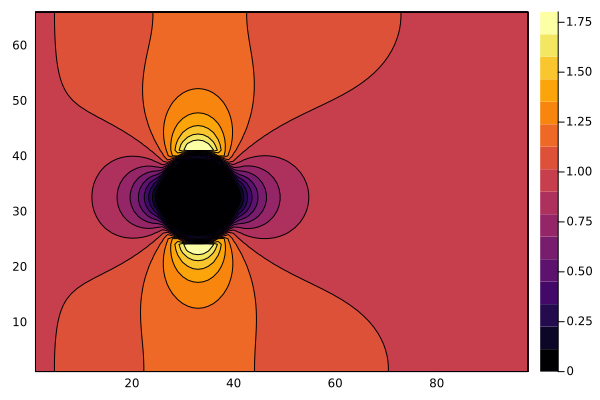

In [1]:
using WaterLily
function circle(n, m; Re=100, U=1)
    # signed distance function to circle
    radius, center = m / 8, m / 2 - 1
    sdf(x, t) = √sum(abs2, x .- center) - radius

    Simulation((n, m),   # domain size
        (U, 0),   # domain velocity (& velocity scale)
        2radius; # length scale
        ν=U * 2radius / Re,     # fluid viscosity
        body=AutoBody(sdf)) # geometry
end

circ = circle(3 * 2^5, 2^6)
sim_step!(circ)

using Plots
u = circ.flow.u[:, :, 1] # first component is x
contourf(u') # transpose the array for the plot

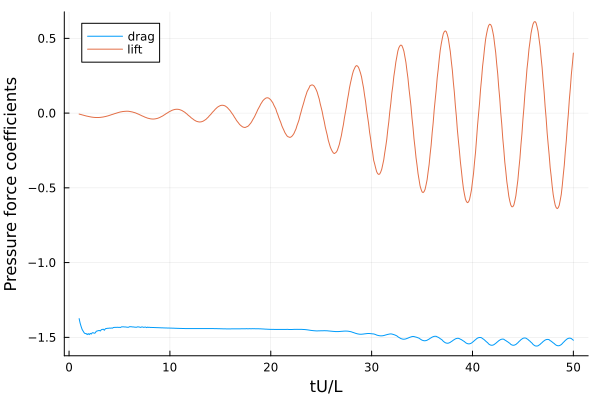

In [2]:
function get_forces!(sim, t)
    sim_step!(sim, t, remeasure=false)
    force = WaterLily.pressure_force(sim)
    force ./ (0.5sim.L * sim.U^2) # scale the forces!
end

# Simulate through the time range and get forces
time = 1:0.1:50 # time scale is sim.L/sim.U
forces = [get_forces!(circ, t) for t in time];

#Plot it
plot(time, [first.(forces) last.(forces)],
    labels=["drag" "lift"],
    xlabel="tU/L",
    ylabel="Pressure force coefficients")